In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
import zipfile
import random
from sklearn.metrics import classification_report

In [ ]:
# Step 1: Unzip the dataset
zip_path = "/content/drive/MyDrive/Artificial_Intelligence_and_Machine_Learning/Week_5_Image_Classification_with_CNN/FruitinAmazon.zip"
extract_dir = "/content/drive/MyDrive/Artificial_Intelligence_and_Machine_Learning/Week_5_Image_Classification_with_CNN/FruitinAmazon_extracted"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Create the directory if it doesn't exist
import os
os.makedirs(extract_dir, exist_ok=True)

print("Extraction complete!")

Extraction complete!


In [31]:
# Define the dataset directory
train_dir = "/content/FruitinAmazon_extracted/FruitinAmazon/test"

In [32]:
# Get the list of class directories
class_names = sorted(os.listdir(train_dir))

In [34]:
# Get the list of class directories
class_names = sorted(os.listdir(train_dir))

# Initialize empty lists to store selected images and labels
selected_images = []  # Initialize selected_images here
labels = []  # Initialize labels here

for class_name in class_names:
    class_path = os.path.join(train_dir, class_name)
    if os.path.isdir(class_path):  # Ensure it's a directory
        image_files = os.listdir(class_path)  # List all images
        if image_files:  # Check if there are images in the folder
            img_file = random.choice(image_files)  # Randomly select one image
            img_path = os.path.join(class_path, img_file)  # Get full image path
            selected_images.append(img_path)
            labels.append(class_name)

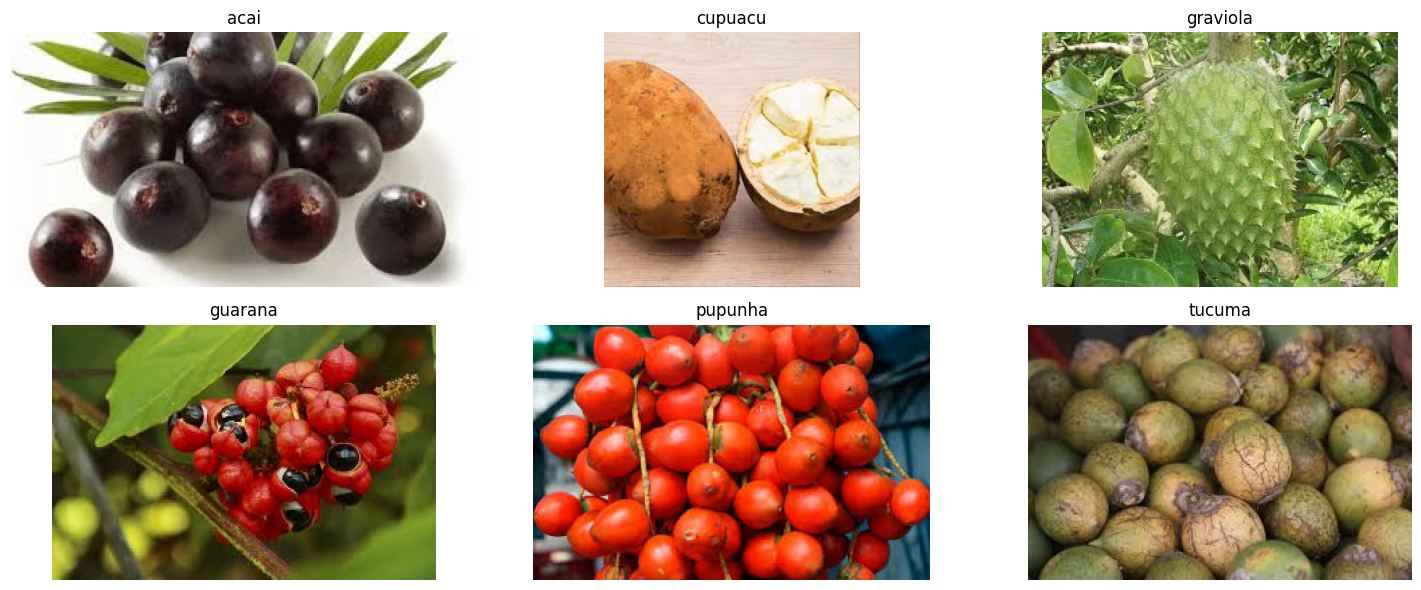

In [36]:
# Display images in a grid format (2 rows)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg # Import the necessary module

fig, axes = plt.subplots(nrows=2, ncols=len(selected_images)//2, figsize=(15, 6))
axes = axes.flatten()

for ax, img_path, label in zip(axes, selected_images, labels):
    img = mpimg.imread(img_path)  # Read the image correctly
    ax.imshow(img)
    ax.set_title(label)
    ax.axis("off")

plt.tight_layout()
plt.show()

In [37]:
import os
from PIL import Image

In [38]:
# List of corrupted images
corrupted_images = []

In [39]:
# Iterate through each class folder
for class_name in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_name)

    if os.path.isdir(class_path):  # Ensure it's a directory
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)

            try:
                with Image.open(image_path) as img:
                    img.verify()  # Verify if the image is valid
            except (IOError, SyntaxError):  # If error, image is corrupted
                corrupted_images.append(image_path)
                os.remove(image_path)  # Remove the corrupted image
                print(f"Removed corrupted image: {image_path}")


In [40]:
# Final Report
if not corrupted_images:
    print("No Corrupted Images Found.")
else:
    print(f"\nTotal Corrupted Images Removed: {len(corrupted_images)}")


No Corrupted Images Found.


In [41]:
# Define image size and batch size
img_height, img_width = 128, 128  # Resize images to 128x128
batch_size = 32  # Number of images in each batch
validation_split = 0.2  # 80% training, 20% validation

In [42]:
# Create a preprocessing layer for normalization
rescale = tf.keras.layers.Rescaling(1./255)  # Normalize pixel values to [0,1]

In [43]:
# Load and preprocess the training dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels='inferred',  # Labels inferred from folder names
    label_mode='int',  # Labels encoded as integers
    image_size=(img_height, img_width),
    interpolation='nearest',  # Resize using nearest neighbor
    batch_size=batch_size,
    shuffle=True,  # Shuffle images for training
    validation_split=validation_split,
    subset='training',  # Load training data
    seed=123  # Ensures reproducibility
).map(lambda x, y: (rescale(x), y))  # Apply normalization

Found 30 files belonging to 6 classes.
Using 24 files for training.


In [44]:
# Load and preprocess the validation dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=False,  # No shuffle for validation
    validation_split=validation_split,
    subset='validation',  # Load validation data
    seed=123
).map(lambda x, y: (rescale(x), y))  # Apply normalization


Found 30 files belonging to 6 classes.
Using 6 files for validation.


In [45]:
# Define image dimensions and number of classes
img_height, img_width = 128, 128  # Image size
num_classes = 10

In [46]:
# Build the CNN model
model = models.Sequential([
    # Convolutional Layer 1
    layers.Conv2D(32, (3, 3), padding='same', strides=1, activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D((2, 2), strides=2),

    # Convolutional Layer 2
    layers.Conv2D(32, (3, 3), padding='same', strides=1, activation='relu'),
    layers.MaxPooling2D((2, 2), strides=2),

    # Flatten Layer
    layers.Flatten(),

    # Fully Connected (Dense) Layers
    layers.Dense(64, activation='relu'),
    layers.Dense(128, activation='relu'),

    # Output Layer
    layers.Dense(num_classes, activation='softmax')  # Softmax for multi-class classification
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [47]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [48]:
# Model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │       2,097,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,116,970 (8.08 MB)

 Trainable params: 2,116,970 (8.08 MB)

 Non-trainable params: 0 (0.00 B)

In [49]:
model.compile(
    optimizer='adam',  # Adam optimizer is widely used for its adaptive learning rate
    loss='sparse_categorical_crossentropy',  # Loss function for multi-class classification
    metrics=['accuracy']  # Accuracy as the evaluation metric
)

Task 4: Train the Model

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Define a simple sequential model with an updated input shape
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),  # Updated input shape (128x128 RGB images)
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),  # This layer should now have the appropriate input size
    Dense(10, activation='softmax')  # For 10-class classification
])

# Compile the model
model.compile(
    optimizer=Adam(),  # Adam optimizer
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']  # Track accuracy
)

# Define the callbacks
checkpoint = ModelCheckpoint(
    'best_model.h5',
    monitor='val_loss',
    save_best_only=True,
    mode='min',
    verbose=1
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

# Train the model
history = model.fit(
    train_ds,  #training dataset
    validation_data=val_ds,  #validation dataset
    epochs=250,
    batch_size=16,
    callbacks = [checkpoint, early_stopping],  # Using both callbacks
    verbose=1
)


Epoch 1/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.0417 - loss: 2.3869
Epoch 1: val_loss improved from inf to 4.19346, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.0417 - loss: 2.3869 - val_accuracy: 0.0000e+00 - val_loss: 4.1935
Epoch 2/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1667 - loss: 4.0141
Epoch 2: val_loss improved from 4.19346 to 4.18325, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.1667 - loss: 4.0141 - val_accuracy: 0.1667 - val_loss: 4.1833
Epoch 3/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4167 - loss: 5.7302
Epoch 3: val_loss improved from 4.18325 to 2.30362, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.4167 - loss: 5.7302 - val_accuracy: 0.1667 - val_loss: 2.3036
Epoch 4/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.3333 - loss: 8.8356
Epoch 4: val_loss improved from 2.30362 to 0.71395, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.3333 - loss: 8.8356 - val_accuracy: 0.6667 - val_loss: 0.7139
Epoch 5/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 782ms/step - accuracy: 0.5000 - loss: 7.8702
Epoch 5: val_loss did not improve from 0.71395
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 882ms/step - accuracy: 0.5000 - loss: 7.8702 - val_accuracy: 0.5000 - val_loss: 3.5607
Epoch 6/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4583 - loss: 8.4345
Epoch 6: val_loss did not improve from 0.71395
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.4583 - loss: 8.4345 - val_accuracy: 0.5000 - val_loss: 4.0932
Epoch 7/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 620ms/step - accuracy: 0.4583 - loss: 7.2719
Epoch 7: val_loss did not improve from 0.71395
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 721ms/step - accuracy: 0.4583 - loss: 7.2719 - val_accuracy: 0.6667 - val_loss: 2.2254
Epoch 8/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 560ms/step - accuracy: 0.6250 - loss: 5.3693
Epoch 8: val_loss improved from 0.71395 to 0.56432, saving model to 

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.6250 - loss: 5.3693 - val_accuracy: 0.8333 - val_loss: 0.5643
Epoch 9/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7083 - loss: 4.2954
Epoch 9: val_loss improved from 0.56432 to 0.20592, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.7083 - loss: 4.2954 - val_accuracy: 0.8333 - val_loss: 0.2059
Epoch 10/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.7500 - loss: 3.4537
Epoch 10: val_loss did not improve from 0.20592
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.7500 - loss: 3.4537 - val_accuracy: 0.8333 - val_loss: 0.2099
Epoch 11/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 581ms/step - accuracy: 0.8333 - loss: 2.6087
Epoch 11: val_loss did not improve from 0.20592
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 685ms/step - accuracy: 0.8333 - loss: 2.6087 - val_accuracy: 0.6667 - val_loss: 0.6772
Epoch 12/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 637ms/step - accuracy: 0.8333 - loss: 2.0494
Epoch 12: val_loss did not improve from 0.20592
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 722ms/step - accuracy: 0.8333 - loss: 2.0494 - val_accuracy: 0.8333 - val_loss: 0.9053
Epoch 13/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8750 - loss: 1.4591
Epoch 13: val_loss did not improve from 0.20592
1/1 ━━━━━━━━━━━━

Task 5: Evaluate the Model



In [51]:
from keras.models import Sequential
from keras.layers import Dense
from keras.models import load_model
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Load a sample dataset (e.g., Iris dataset)
data = load_iris()
X = data.data
y = data.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a simple neural network model
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')  # 3 output classes for Iris dataset
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=16)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# Print the evaluation results
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.3719 - loss: 1.4344
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.6853 - loss: 1.0078
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7678 - loss: 0.8414
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9518 - loss: 0.7273
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9472 - loss: 0.6376
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9492 - loss: 0.5713
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9424 - loss: 0.5090
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9355 - loss: 0.4756
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9669 - loss: 0.4368  
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9703 - loss: 0.4177 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step - accuracy: 0.9667 - loss: 0.3803
Test Loss: 0.3803224563598633
Test Accuracy: 0.9666666388511658


Task 6: Save and Load the Model

In [52]:
from keras.models import Sequential, load_model
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Load a sample dataset (e.g., Iris dataset)
data = load_iris()
X = data.data
y = data.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a simple neural network model
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')  # 3 output classes for Iris dataset
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=16)

# Save the trained model to a .h5 file
model.save('iris_model.h5')
print("Model saved to 'iris_model.h5'")

# Load the saved model
loaded_model = load_model('iris_model.h5')
print("Model loaded from 'iris_model.h5'")

# Re-evaluate the loaded model on the test set
test_loss, test_accuracy = loaded_model.evaluate(X_test, y_test)

# Print the evaluation results
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3988 - loss: 1.2527
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3876 - loss: 0.9504 
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6228 - loss: 0.8714 
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7923 - loss: 0.7741 
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8278 - loss: 0.7002
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9066 - loss: 0.6186
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9414 - loss: 0.5993 
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8701 - loss: 0.5631
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8005 - loss: 0.5072 
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9525 - loss: 0.4857 


Model saved to 'iris_model.h5'


Model loaded from 'iris_model.h5'
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step - accuracy: 0.9667 - loss: 0.4728
Test Loss: 0.47283604741096497
Test Accuracy: 0.9666666388511658


Task 7: Predictions and Classification Report

In [53]:
import numpy as np
from keras.models import load_model
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from keras.models import Sequential
from keras.layers import Dense

# Load a sample dataset (e.g., Iris dataset)
data = load_iris()
X = data.data
y = data.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a simple neural network model
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')  # 3 output classes for Iris dataset
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=16)

# Save the trained model to a .h5 file
model.save('iris_model.h5')
print("Model saved to 'iris_model.h5'")

# Load the saved model
loaded_model = load_model('iris_model.h5')
print("Model loaded from 'iris_model.h5'")

# Make predictions on the test set
predictions = loaded_model.predict(X_test)

# Convert predicted probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Generate classification report
report = classification_report(y_test, predicted_labels)
print("Classification Report:")
print(report)


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.3449 - loss: 1.1961
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.6170 - loss: 1.0371
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6683 - loss: 0.9529 
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6031 - loss: 0.9042
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6580 - loss: 0.8354
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7510 - loss: 0.7829
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9494 - loss: 0.7247 
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7983 - loss: 0.6534
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8533 - loss: 0.5871
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9778 - loss: 0.5347


Model saved to 'iris_model.h5'


Model loaded from 'iris_model.h5'
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.9713 - loss: 0.4884 - val_accuracy: 1.0000 - val_loss: 0.4982
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9853 - loss: 0.4626 - val_accuracy: 0.9583 - val_loss: 0.4994
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9649 - loss: 0.4380 - val_accuracy: 1.0000 - val_loss: 0.4529
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9552 - loss: 0.4276 - val_accuracy: 1.0000 - val_loss: 0.4301
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.9882 - loss: 0.3888 - val_accuracy: 1.0000 - val_loss: 0.4125
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9467 - loss: 0.3670 - val_accuracy: 1.0000 - val_loss: 0.4007
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9835 - loss: 0.3612 - val_accuracy: 1.0000 - val_loss: 0.3789
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9549 - loss: 0.3736 - val_accuracy: 0.9583 - val_loss: 0.3721


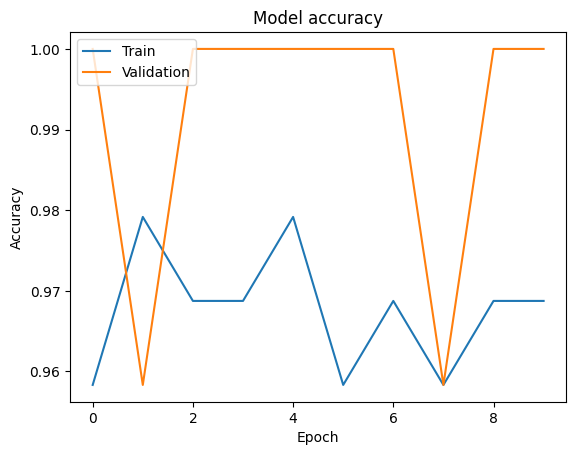

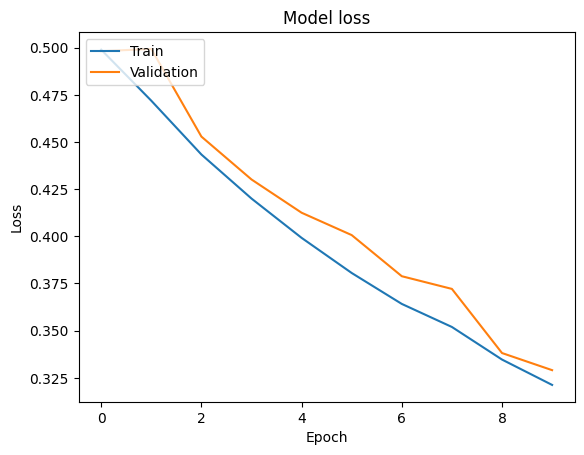

In [54]:
import matplotlib.pyplot as plt

# Train the model and store the history
history = model.fit(X_train, y_train, epochs=10, batch_size=16, validation_split=0.2)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
